In [1]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
fraud_data  = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud_data.columns= ['Undergrad','Marital_status','Taxable_income','City_population','Work_experience','Urban']

In [6]:
fraud_data.head()

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
fraud_data.loc[fraud_data['Taxable_income']<= 30000,'taxable_income'] = 'Risky'
fraud_data.loc[fraud_data['Taxable_income']>30000,'taxable_income'] = 'Good'

In [11]:
fraud_data.drop('Taxable_income',axis=1,inplace=True)

In [12]:
fraud_data

,Undergrad,Marital_status,City_population,Work_experience,Urban,taxable_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [13]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_status   600 non-null    object
 2   City_population  600 non-null    int64 
 3   Work_experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   taxable_income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [14]:
fraud_data.describe(include='all')

,Undergrad,Marital_status,City_population,Work_experience,Urban,taxable_income
count,600,600,600.000000,600.000000,600,600
unique,2,3,NaN,NaN,2,2
top,YES,Single,NaN,NaN,YES,Good
freq,312,217,NaN,NaN,302,476
mean,NaN,NaN,108747.368333,15.558333,NaN,NaN
std,NaN,NaN,49850.075134,8.842147,NaN,NaN
min,NaN,NaN,25779.000000,0.000000,NaN,NaN
25%,NaN,NaN,66966.750000,8.000000,NaN,NaN
50%,NaN,NaN,106493.500000,15.000000,NaN,NaN
75%,NaN,NaN,150114.250000,24.000000,NaN,NaN


In [18]:
le = LabelEncoder()
fraud_data['Undergrad'] = le.fit_transform(fraud_data['Undergrad'])
fraud_data.Undergrad.unique()

array([0, 1], dtype=int64)

In [19]:
fraud_data['Marital_status'] = le.fit_transform(fraud_data['Marital_status'])
fraud_data.Marital_status.unique()

array([2, 0, 1])

In [20]:
fraud_data['Urban'] = le.fit_transform(fraud_data['Urban'])
fraud_data.Urban.unique()

array([1, 0])

In [23]:
X = fraud_data.drop('taxable_income',axis=1)

In [24]:
X

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [26]:
Y = fraud_data[['taxable_income']]
Y

,taxable_income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state=0)

In [28]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [29]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

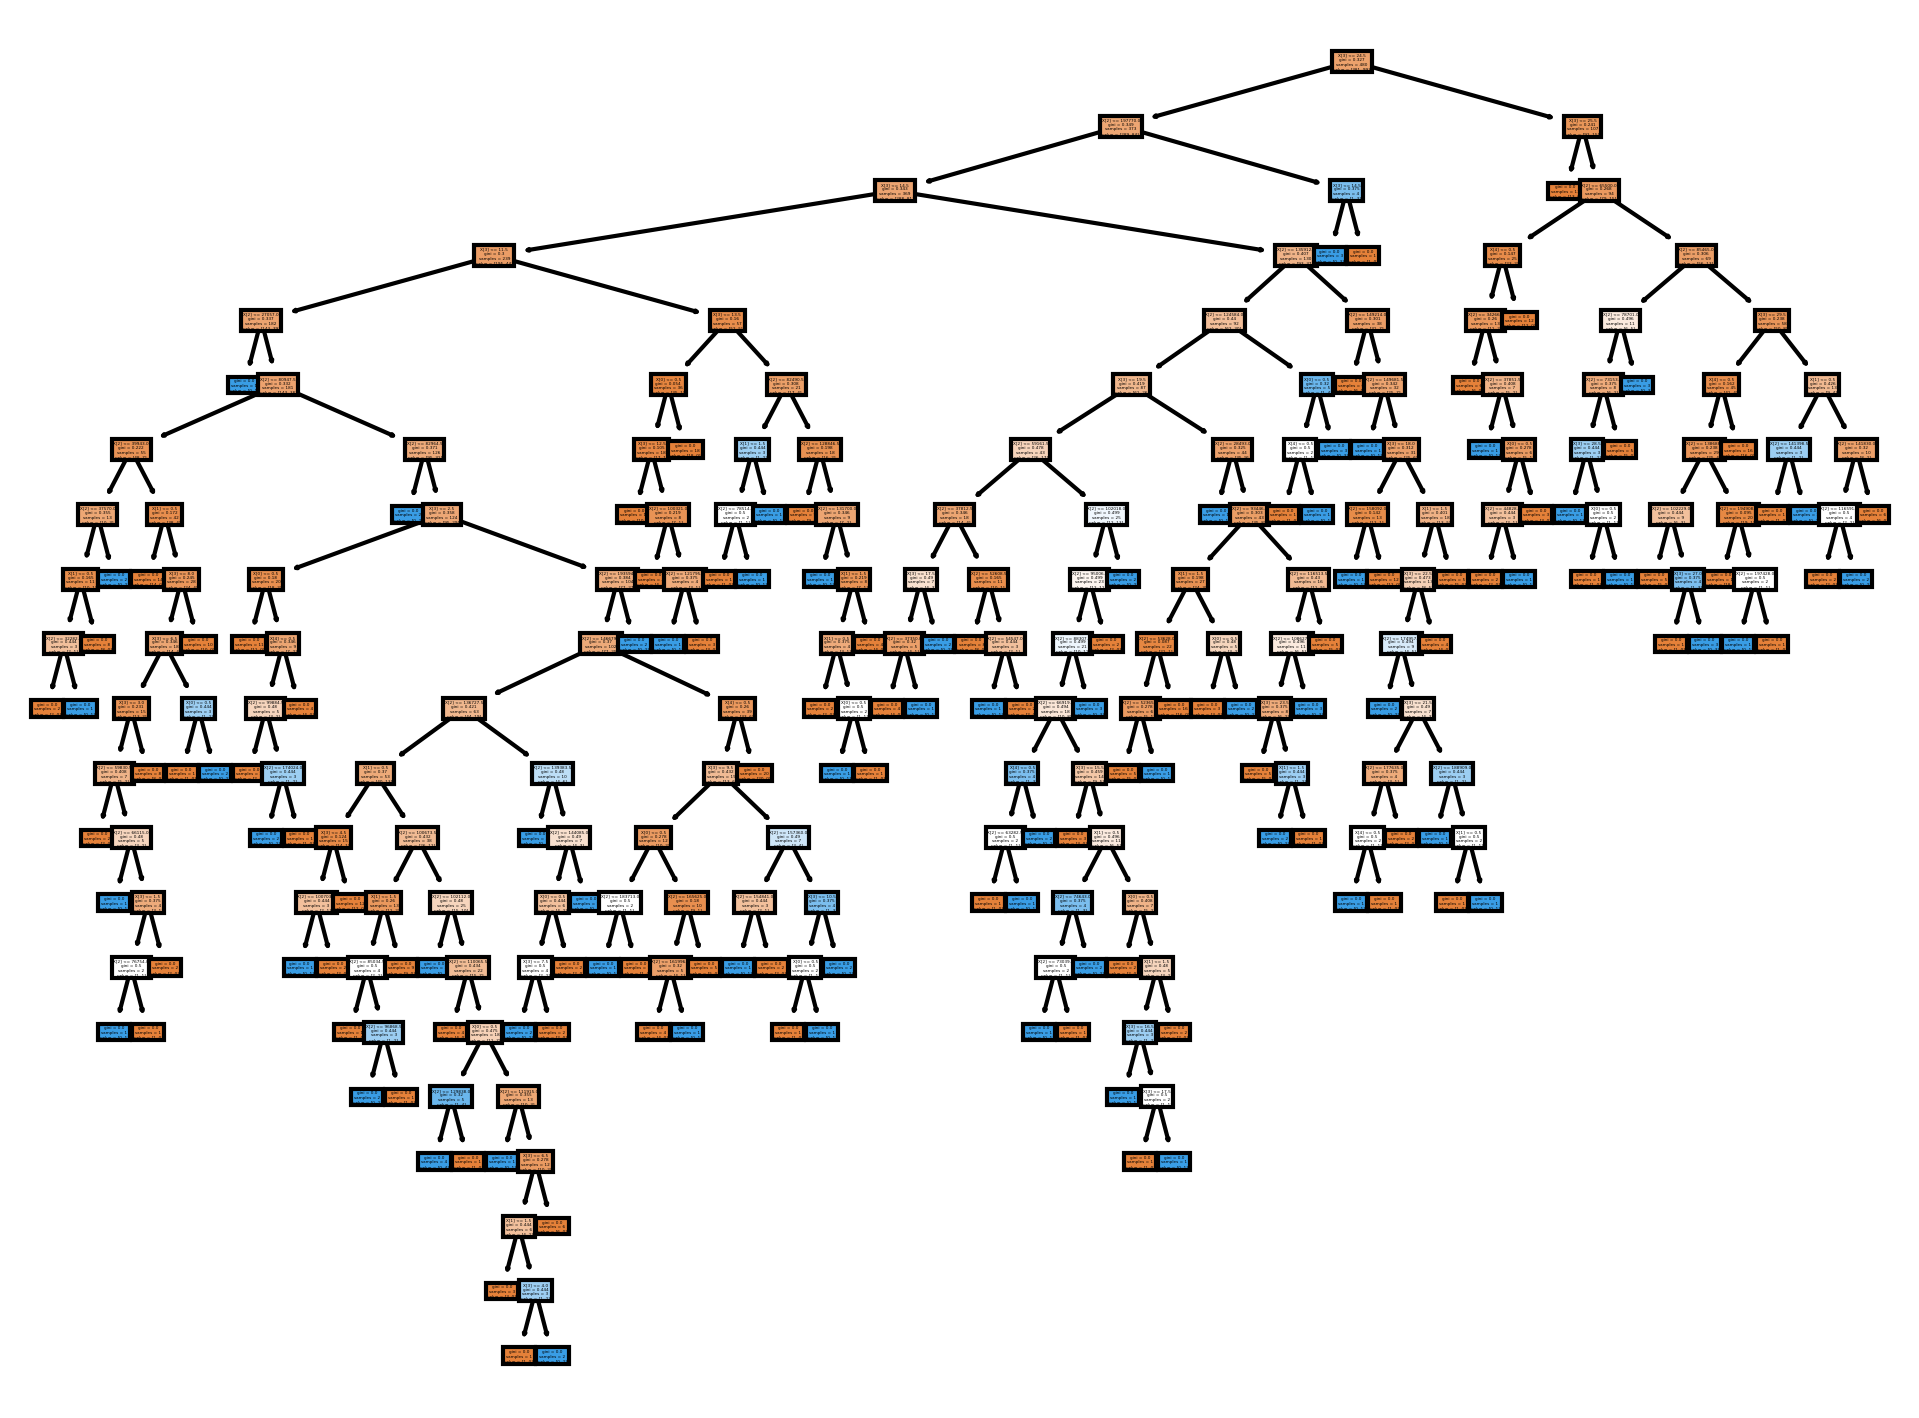

In [31]:
g, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6), dpi=300)
tree.plot_tree(model,filled=True);

In [32]:
y_train_pred = model.predict(x_train)
print('Accuracy score:', accuracy_score(y_train,y_train_pred))

Accuracy score: 1.0


In [33]:
print('Confusion Matrix :\n',confusion_matrix(y_train,y_train_pred))

Confusion Matrix :
 [[381   0]
 [  0  99]]


In [34]:
y_test_pred = model.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_test_pred))

Accuracy score: 0.6333333333333333


In [35]:
print('Confusion Matrix :\n',confusion_matrix(y_test,y_test_pred))

Confusion Matrix :
 [[69 26]
 [18  7]]


### High training accuracy and low testing accuracy indicates that the model is overfitting.

In [41]:
#Applying ensemple technique to overcome overfitting

### 1.Gradient Boosting

In [42]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [38]:
y_train_pred_gbc = gbc.predict(x_train)
print('Accuracy score:',accuracy_score(y_train,y_train_pred_gbc))

Accuracy score: 0.8708333333333333


In [40]:
y_test_pred_gbc = gbc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_test_pred_gbc))

Accuracy score: 0.7583333333333333


### 2.Adaboost

In [44]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [52]:
y_train_pred_abc = abc.predict(x_train)
print('Accuracy score for Training Data:', accuracy_score(y_train,y_train_pred_abc))

Accuracy score for Training Data: 0.8104166666666667


In [53]:
y_test_pred_abc = abc.predict(x_test)
print('Accuracy score for Testing Data:', accuracy_score(y_test,y_test_pred_abc))

Accuracy score for Testing Data: 0.775


In [51]:
print('COnfusion Matrix for Training Data:\n', confusion_matrix(y_train,y_train_pred_abc))

COnfusion Matrix for Training Data:
 [[380   1]
 [ 90   9]]


In [50]:
print('COnfusion Matrix for Testing Data:\n', confusion_matrix(y_test,y_test_pred_abc))

COnfusion Matrix for Testing Data:
 [[93  2]
 [25  0]]
